In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 


In [37]:
data = pd.read_csv("encoded_data_cat.csv")

# split features and target variables
X = data.drop(columns=['Disease'])
y = data['Disease']

# print(data.isnull().sum())
print(X.columns)
print(X.sum())
print('Feature Percentage')
print((X.sum()/3624)*100)
print('Diseases')
print(y.value_counts())
# print(y.sum())

# print(f"Number of unique rows: {num_unique_rows}")

Index([' continuous_sneezing', ' shivering', ' chills', ' watering_from_eyes',
       ' fatigue', ' weight_loss', ' restlessness', ' lethargy', ' cough',
       ' high_fever', ' headache', ' chest_pain', ' dizziness',
       ' loss_of_balance', ' vomiting', ' breathlessness', ' muscle_weakness',
       ' stiff_neck', ' swelling_joints', ' movement_stiffness'],
      dtype='object')
 continuous_sneezing    222
 shivering              108
 chills                 336
 watering_from_eyes     108
 fatigue                558
 weight_loss            228
 restlessness           114
 lethargy               144
 cough                  246
 high_fever             138
 headache               108
 chest_pain             222
 dizziness              108
 loss_of_balance        114
 vomiting               222
 breathlessness         222
 muscle_weakness        114
 stiff_neck             114
 swelling_joints        114
 movement_stiffness     114
dtype: int64
Feature Percentage
 continuous_sneezing   

In [38]:
print(data.columns)

Index(['Disease', ' continuous_sneezing', ' shivering', ' chills',
       ' watering_from_eyes', ' fatigue', ' weight_loss', ' restlessness',
       ' lethargy', ' cough', ' high_fever', ' headache', ' chest_pain',
       ' dizziness', ' loss_of_balance', ' vomiting', ' breathlessness',
       ' muscle_weakness', ' stiff_neck', ' swelling_joints',
       ' movement_stiffness'],
      dtype='object')


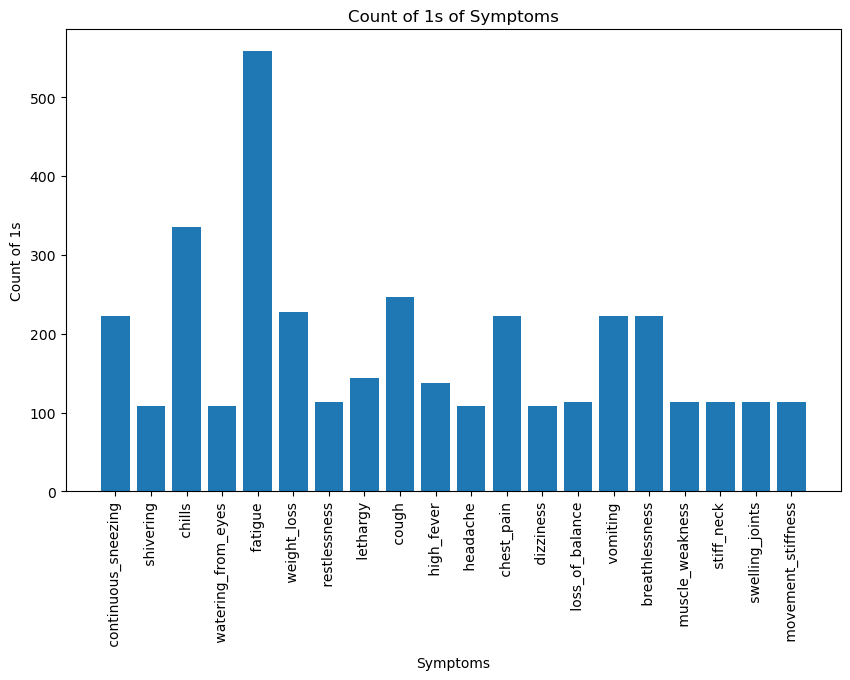

In [ ]:
symptom_columns = X.columns
symptoms_data = data[symptom_columns]

# Calculate descriptive statistics for binary data
count_ones = symptoms_data.sum()
count_zeros = symptoms_data.shape[0] - count_ones

descriptive_stats_binary = pd.DataFrame({
    'Count of 1s': count_ones,
    'Count of 0s': count_zeros
})

# Define a function to plot bar graphs for the descriptive statistics
def plot_bar_graphs(stats, columns, stat_name):
    plt.figure(figsize=(10, 6))
    plt.bar(columns, stats[stat_name])
    plt.title(f'{stat_name} of Symptoms')
    plt.xlabel('Symptoms')
    plt.ylabel(stat_name)
    plt.xticks(rotation=90)
    plt.show()

# # Plot the bar graphs
# plot_bar_graphs(descriptive_stats_binary, symptom_columns, 'Proportion of 1s')
plot_bar_graphs(descriptive_stats_binary, symptom_columns, 'Count of 1s')
# plot_bar_graphs(descriptive_stats_binary, symptom_columns, 'Count of 0s')


C:\Users\D\AppData\Local\Temp\ipykernel_14000\2459369312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Disease", y = "Counts", data = temp_df, palette='viridis')


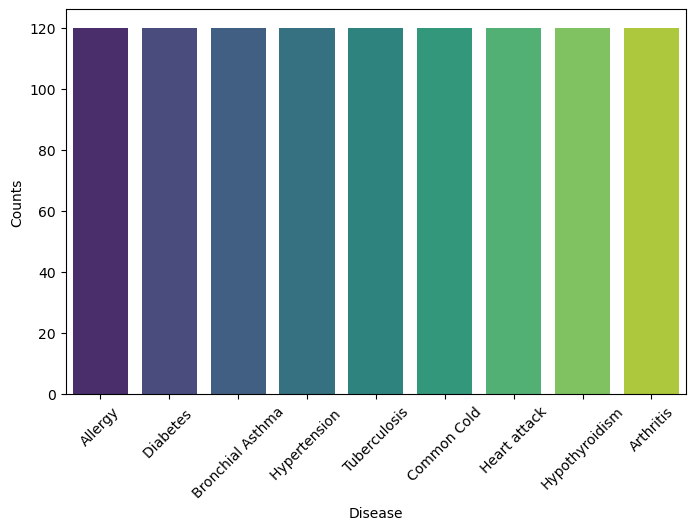

In [40]:
disease_counts = data["Disease"].value_counts() 
temp_df = pd.DataFrame({ 
    "Disease": disease_counts.index, 
    "Counts": disease_counts.values 
}) 
  
plt.figure(figsize = (8,5)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df, palette='viridis')
plt.xticks(rotation=45) 
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_model = RandomForestClassifier()
rf_model.fit(X_scaled, y)
importances = rf_model.feature_importances_


feature_importances = pd.DataFrame({
    'Feature': data.columns[:-1],  # Exclude the target column from feature list
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# indices = np.argsort(importances)[::-1]

# print("Top 10 features using Random Forest:", data.columns[indices[:10]])


                 Feature  Importance
5                fatigue    0.086857
14       loss_of_balance    0.086532
15              vomiting    0.084702
6            weight_loss    0.070745
0                Disease    0.064661
8               lethargy    0.062708
11              headache    0.059139
1    continuous_sneezing    0.052854
13             dizziness    0.051186
3                 chills    0.044841
9                  cough    0.041300
2              shivering    0.039567
19       swelling_joints    0.039171
4     watering_from_eyes    0.038657
12            chest_pain    0.034106
7           restlessness    0.030090
17       muscle_weakness    0.029965
16        breathlessness    0.029272
10            high_fever    0.028032
18            stiff_neck    0.025614


In [69]:
# Encode the target variable (Disease) into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(label_encoder.classes_)
# One-hot encode the target variable
y_one_hot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

['Allergy' 'Arthritis' 'Bronchial Asthma' 'Common Cold' 'Diabetes '
 'Heart attack' 'Hypertension ' 'Hypothyroidism' 'Tuberculosis']


In [68]:
y_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(y_one_hot.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#checkpoint to save the last best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', 
                             save_best_only=True, mode='min', verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)


history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stop, reduce_lr])


Epoch 1/100
16/27 [================>.............] - ETA: 0s - loss: 2.8582 - accuracy: 0.1465
Epoch 00001: val_loss improved from inf to 1.80082, saving model to best_model.keras
27/27 [==============================] - 1s 29ms/step - loss: 2.5521 - accuracy: 0.2037 - val_loss: 1.8008 - val_accuracy: 0.7731
Epoch 2/100
16/27 [================>.............] - ETA: 0s - loss: 1.5415 - accuracy: 0.5137
Epoch 00002: val_loss improved from 1.80082 to 1.35458, saving model to best_model.keras
27/27 [==============================] - 0s 7ms/step - loss: 1.4138 - accuracy: 0.5567 - val_loss: 1.3546 - val_accuracy: 0.9398
Epoch 3/100
18/27 [===================>..........] - ETA: 0s - loss: 1.0087 - accuracy: 0.7465
Epoch 00003: val_loss improved from 1.35458 to 1.00377, saving model to best_model.keras
27/27 [==============================] - 0s 8ms/step - loss: 0.9770 - accuracy: 0.7535 - val_loss: 1.0038 - val_accuracy: 0.9537
Epoch 4/100
23/27 [========================>.....] - ETA: 0s - l

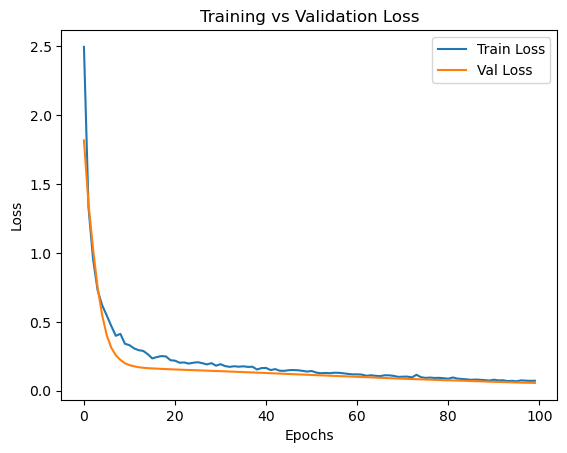

[0.26273149251937866, 0.6076388955116272, 0.7488425970077515, 0.8553240895271301, 0.8831018805503845, 0.9016203880310059, 0.9120370149612427, 0.9398148059844971, 0.9328703880310059, 0.9594907164573669, 0.9618055820465088, 0.9664351940155029, 0.96875, 0.9664351940155029, 0.9768518805503845, 0.9861111044883728, 0.9768518805503845, 0.9780092835426331, 0.9780092835426331, 0.9849537014961243, 0.9884259104728699, 0.9884259104728699, 0.9872685074806213, 0.9918981194496155, 0.9849537014961243, 0.9849537014961243, 0.9872685074806213, 0.9942129850387573, 0.9826388955116272, 0.9907407164573669, 0.9849537014961243, 0.9907407164573669, 0.9930555820465088, 0.9895833134651184, 0.9907407164573669, 0.9918981194496155, 0.9907407164573669, 0.9907407164573669, 0.9965277910232544, 0.9918981194496155, 0.9884259104728699, 0.9976851940155029, 0.9907407164573669, 0.9976851940155029, 0.9988425970077515, 0.9942129850387573, 0.9918981194496155, 0.9918981194496155, 0.9942129850387573, 0.9953703880310059, 0.9930555

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

print(history.history['accuracy'][:-1])

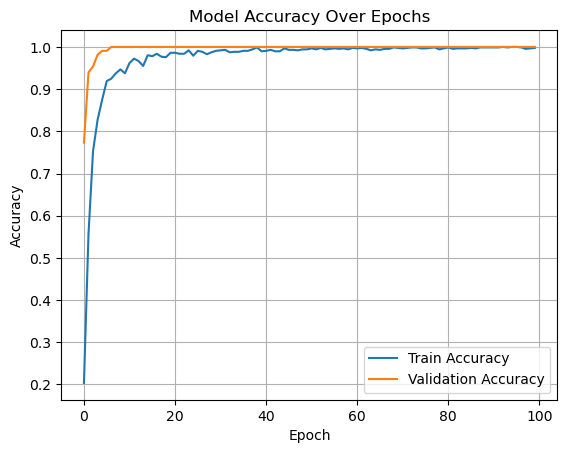

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()
